<a href="https://colab.research.google.com/github/tushar-lawande/Data-Science-Project-Code-Soft/blob/main/TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



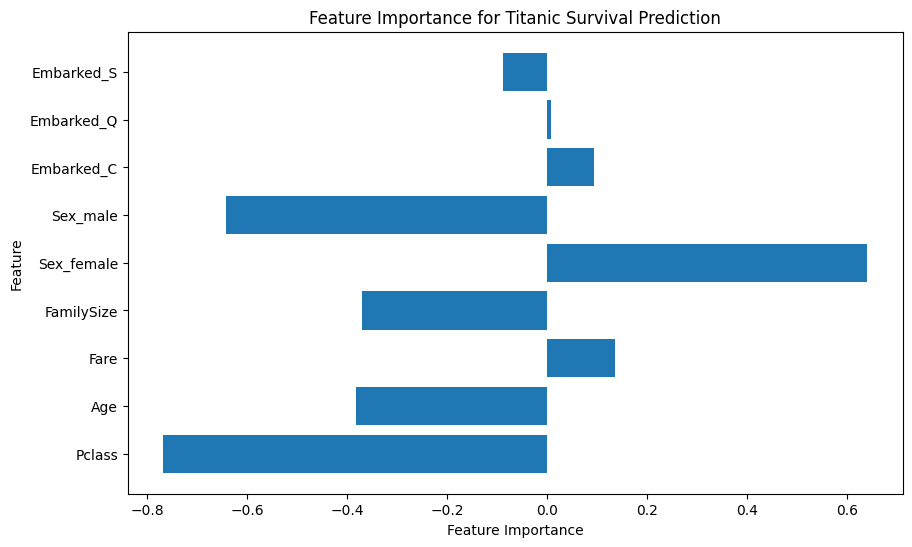

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import uniform
import matplotlib.pyplot as plt

# Set the path to the Titanic dataset
dataset_path = "/content/Titanic-Dataset.csv"  # Replace "path_to_titanic_dataset.csv" with the actual path

# Load the Titanic dataset
# Load the Titanic dataset
# Load the Titanic dataset
titanic_data = pd.read_csv("/content/Titanic-Dataset.csv")

# Data preprocessing
# Fill missing values
titanic_data["Age"].fillna(titanic_data["Age"].median(), inplace=True)
titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0], inplace=True)

# Feature engineering
titanic_data["FamilySize"] = titanic_data["SibSp"] + titanic_data["Parch"]

# Feature selection
features = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize"]
X = titanic_data[features]
y = titanic_data["Survived"]

# Convert categorical variables to numerical
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning
param_distributions = {
    'C': uniform(loc=0, scale=4)
}
model = LogisticRegression(max_iter=1000)
random_search = RandomizedSearchCV(model, param_distributions, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Make predictions
y_pred = random_search.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, random_search.best_estimator_.coef_[0])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Titanic Survival Prediction")
plt.show()
